In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
path = r'/Users/matthewabrams/Desktop/Stocks Data/'
stocks = pd.read_csv(os.path.join(path, 'Stock Datasets/New Files/6_Stocks_Transformed.csv'), index_col = False)
stocks.drop(columns =['Unnamed: 0', 'MA_Six_Months', 'MA_One_Year'], inplace = True)
stocks

,Date,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $
0,2014-09-22,Amazon,62189780,16.2250,16.4245,16.4745,16.4745
1,2014-09-23,Amazon,46972460,16.1815,16.1230,16.3800,16.3800
2,2014-09-24,Amazon,52802720,16.4105,16.2085,16.4720,16.4720
3,2014-09-25,Amazon,58573060,16.0965,16.3995,16.4270,16.4270
4,2014-09-26,Amazon,72707740,16.1605,16.0300,16.1750,16.1750
...,...,...,...,...,...,...,...
15097,2024-09-16,Tesla,54323000,226.7800,229.3000,229.9600,223.5300
15098,2024-09-17,Tesla,66761640,227.8700,229.4500,234.5700,226.5533
15099,2024-09-18,Tesla,78010200,227.2000,230.0900,235.6800,226.8800
15100,2024-09-19,Tesla,102694600,243.9200,234.0000,244.2400,232.1300


In [3]:
# Choosing a stock for clustering

apple_stock = stocks[stocks['Stock_Name']=='Apple']
apple_stock

,Date,Stock_Name,Volume,Close/Last in $,Open in $,High in $,Low in $
2517,2014-09-22,Apple,209686640,25.2650,25.4500,25.5350,25.5350
2518,2014-09-23,Apple,253023440,25.6600,25.1500,25.7350,25.7350
2519,2014-09-24,Apple,239897040,25.4375,25.5400,25.7125,25.7125
2520,2014-09-25,Apple,398757200,24.4675,25.1275,25.1775,25.1775
2521,2014-09-26,Apple,249107080,25.1875,24.6325,25.1875,25.1875
...,...,...,...,...,...,...,...
5029,2024-09-16,Apple,59357430,216.3200,216.5400,217.2200,217.2200
5030,2024-09-17,Apple,45519340,216.7900,215.7500,216.9000,216.9000
5031,2024-09-18,Apple,59894930,220.6900,217.5500,222.7100,222.7100
5032,2024-09-19,Apple,66781320,228.8700,224.9900,229.8200,229.8200


In [4]:
# Printing a subset of apple_stock dataframe by columns by numerical data (excluding categorical data)

apple_stock = apple_stock[['Volume', 'Close/Last in $', 'Open in $', 'High in $', 'Low in $']]
apple_stock

,Volume,Close/Last in $,Open in $,High in $,Low in $
2517,209686640,25.2650,25.4500,25.5350,25.5350
2518,253023440,25.6600,25.1500,25.7350,25.7350
2519,239897040,25.4375,25.5400,25.7125,25.7125
2520,398757200,24.4675,25.1275,25.1775,25.1775
2521,249107080,25.1875,24.6325,25.1875,25.1875
...,...,...,...,...,...
5029,59357430,216.3200,216.5400,217.2200,217.2200
5030,45519340,216.7900,215.7500,216.9000,216.9000
5031,59894930,220.6900,217.5500,222.7100,222.7100
5032,66781320,228.8700,224.9900,229.8200,229.8200


In [5]:
clusters = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in clusters] # Defines k-means clusters in the range assigned above.

In [6]:
score = [kmeans[i].fit(apple_stock).score(apple_stock) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1.2140207149705617e+19,
 -4.497104730044961e+18,
 -2.3092792479342653e+18,
 -1.4555185086902193e+18,
 -9.600382726688774e+17,
 -6.798883139558258e+17,
 -5.214338517544339e+17,
 -3.954219607182065e+17,
 -3.1055069472683514e+17]

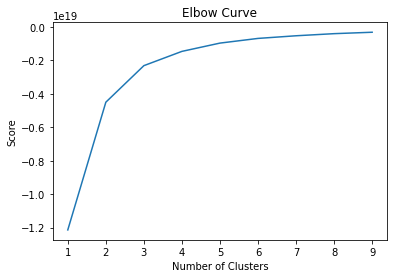

In [7]:
# Plot the elbow curve using PyLab.

pl.plot(clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [8]:
# There's a jump from 3 to 4 on the x axis, but after that, the curve straightens out. 
# That means the optimal number of clusters should be 4

In [9]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1)

In [10]:
# Fit the k-means object to the data.

kmeans.fit(apple_stock)

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [11]:
apple_stock['clusters'] = kmeans.fit_predict(apple_stock)

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/var/folders/t8/xh28456s3kngn8qzvmt25b700000gn/T/ipykernel_47779/974906013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock['clusters'] = kmeans.fit_predict(apple_stock)


In [12]:
apple_stock.head(20)

,Volume,Close/Last in $,Open in $,High in $,Low in $,clusters
2517,209686640,25.2650,25.4500,25.5350,25.5350,3
2518,253023440,25.6600,25.1500,25.7350,25.7350,3
2519,239897040,25.4375,25.5400,25.7125,25.7125,3
2520,398757200,24.4675,25.1275,25.1775,25.1775,2
2521,249107080,25.1875,24.6325,25.1875,25.1875,3
2522,197053040,25.0275,24.6625,25.1088,25.1088,3
2523,220479920,25.1875,25.2025,25.3850,25.3850,3
2524,205601040,24.7950,25.1475,25.1725,25.1725,3
2525,190788600,24.9750,24.8175,25.0550,25.0550,3
2526,173678320,24.9050,24.8600,25.0525,25.0525,3


In [13]:
apple_stock['clusters'].value_counts()

1    1128
0     857
3     419
2     113
Name: clusters, dtype: int64

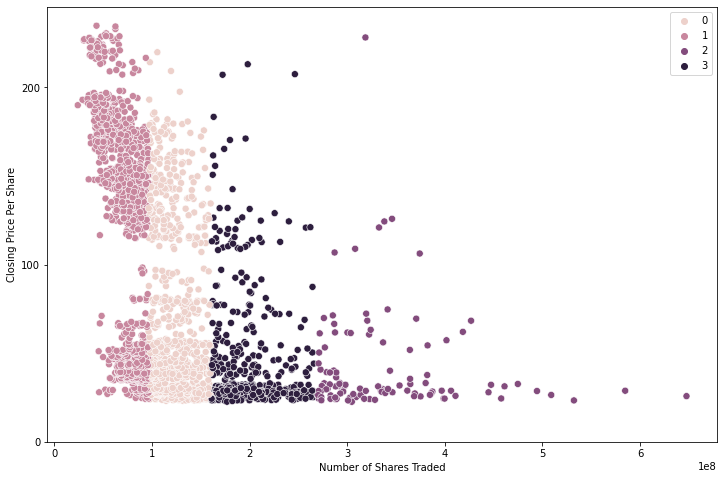

In [17]:
# Plot the clusters for the "Volume" and "Close/Last in $" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = apple_stock['Volume'] , y = apple_stock['Close/Last in $'], hue = kmeans.labels_, s = 50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Shares Traded') # Label x-axis.
x_ticks = np.arange(0, 700000000, 100000000)
y_ticks = np.arange(0, 400, 100)
plt.xticks(x_ticks, rotation = 0)
plt.ylabel('Closing Price Per Share') # Label y-axis.
y_ticks = np.arange(0, 300, 100)
plt.yticks(y_ticks, rotation = 0)
plt.show()

In [15]:
# The first cluster in pink (coded as 1) gathers more data points relating to dates with a higher closing price yet lower number of shares traded 
# The last cluster in purple (coded as 2) gathers more data points relating to dates with a lower closing price yet relative higher number of shares traded 
# The clusters show that gor Apple Stock, if volume of shares decrease, the closing price increases.

In [18]:
apple_stock.loc[apple_stock['clusters'] == 3, 'cluster'] = 'dark purple'
apple_stock.loc[apple_stock['clusters'] == 2, 'cluster'] = 'purple'
apple_stock.loc[apple_stock['clusters'] == 1, 'cluster'] = 'pink'
apple_stock.loc[apple_stock['clusters'] == 0, 'cluster'] = 'salmon colored'

In [19]:
apple_stock.groupby('cluster').agg({'Volume':['mean', 'median'], 
                         'Close/Last in $':['mean', 'median']})

Volume              Close/Last in $          
                        mean       median            mean    median
cluster                                                            
dark purple     1.987911e+08  192317320.0       48.137142   31.8550
pink            6.991102e+07   71165730.0      128.445985  147.1700
purple          3.355511e+08  317424040.0       41.872831   30.5600
salmon colored  1.230971e+08  121121800.0       67.828522   45.4275

In [ ]:
# The average closing price per share received for the purple cluster group is approximately 42 dollars with the average volume of shares over 330 million shares
# The average closing price per share received for the pink cluster group is approximately 128 dollars with the average volume of shares over 330 million shares